# Air Pollution Data Analysis in New York City

## Overview

Air pollution is a significant public health concern with a growing body of evidence linking it to various health problems, including respiratory infections, heart disease, and lung cancer. In urban areas like New York City, the concentration of pollutants can be particularly high due to factors such as dense traffic, industrial activities, and energy production. 

This notebook delves into historical air quality data obtained from the OpenWeatherMap API to analyze trends, identify days with critical pollution levels, and draw insights into the air quality of New York City. The analysis could help inform public health advisories and guide policies for environmental protection.

## Objectives

- **Data Acquisition**: Retrieve historical air pollution data from the OpenWeatherMap API.
- **Data Cleaning and Preparation**: Process the data to facilitate a smooth analysis workflow.
- **Exploratory Data Analysis (EDA)**: Conduct an initial exploration to understand the distributions and relationships within the data.
- **Trend Analysis**: Examine the data for long-term trends in various pollutants.
- **Peak Pollution Identification**: Identify specific timeframes with unusually high pollution levels.
- **Visualization**: Create compelling visual representations of the data to communicate findings effectively.
- **Predictive Analysis**: Attempt to forecast future pollution levels using time-series analysis techniques.

## Significance

Monitoring air pollution is crucial not only for the environment but also for the health and well-being of city residents. By analyzing historical data, we can identify patterns and potential causes of pollution peaks, assess the effectiveness of environmental regulations, and ultimately contribute to the development of strategies for improving air quality.

Understanding the nuances of air pollution also equips urban planners, policymakers, and the general public with the knowledge to make informed decisions, whether it's about regulating emissions, planning city infrastructure, or taking personal measures to reduce exposure to pollutants.

## Data Source

Data for this analysis is sourced from the OpenWeatherMap API, which provides comprehensive historical air pollution data. This reliable data source includes various pollutants such as PM2.5, PM10, CO, SO2, NO2, and O3, which are crucial for assessing air quality. The following code retrieves the geographical coordinates for New York City, necessary to fetch the corresponding pollution data.

## Retrieving and Preprocessing Data

In [24]:
import requests
import os
from dotenv import load_dotenv
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First we need to set the api key so we can use it to access the api
load_dotenv()
api_key = os.getenv("WEATHER_API_KEY")

In [25]:
#Fetch city coordinates from OpenWeatherMap API

def fetch_city_coordinates(api_key, city):
    url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=5&appid={api_key}"
    response = requests.get(url)
    return response.json()

city_coordinates = fetch_city_coordinates(api_key, city="New York City")
lat = city_coordinates[0]['lat']
lon = city_coordinates[0]['lon']
print(f"Latitude: {lat}, Longitude: {lon}")

Latitude: 40.7127281, Longitude: -74.0060152


In [26]:
#Using city coordinates as params, fetch historical air pollution data of NYC

def fetch_air_pollution_data(api_key, lat, lon, start, end):
    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}"
    response = requests.get(url)
    return response.json()

air_pollution_data = fetch_air_pollution_data(api_key, lat, lon, start=1606488670, end=1606747870)

#Process data and convert to Pandas DataFrame
air_pollution_data_list = air_pollution_data['list']

df = pd.DataFrame(air_pollution_data_list)

# Expanding the 'main' and 'components' dictionaries into separate columns
df_main = df['main'].apply(pd.Series)
df_components = df['components'].apply(pd.Series)

# Convert UNIX timestamps to datetime
df['dt'] = pd.to_datetime(df['dt'], unit='s')

# Concatenating all data into one DataFrame
df = pd.concat([df.drop(['main', 'components'], axis=1), df_main, df_components], axis=1)
df.head()

,dt,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-27 15:00:00,4,1134.87,135.90,29.13,2.66,6.32,33.99,50.53,4.94
1,2020-11-27 16:00:00,2,620.84,51.41,31.53,9.21,14.42,16.51,24.08,3.17
2,2020-11-27 17:00:00,2,567.44,39.79,39.07,12.88,17.17,15.99,22.75,3.36
3,2020-11-27 18:00:00,2,547.41,33.98,46.61,13.05,18.84,15.55,22.25,3.61
4,2020-11-27 19:00:00,2,527.38,28.16,48.67,11.80,15.26,13.43,19.61,3.58


## Data Exploration and Visualization

In this section, we delve into the core aspects of our air pollution dataset. The primary focus here is to uncover the underlying patterns within the pollution levels and how they fluctuate over time. To achieve this, we:

- Calculate the mean concentrations for each pollutant, which will serve as a benchmark for understanding typical pollution levels.
- Visualize these mean concentrations to identify which pollutants have the most significant presence in the air.
- Examine how these levels change over time by plotting the concentration trends. This temporal view can help us pinpoint specific periods of elevated pollution and explore potential seasonal or time-based patterns.

Through these steps, we aim to derive actionable insights that could inform better environmental policies and individual decision-making. Let's dive into the data.

In [27]:
#Mean levels of each pollutant
mean_aqi = df['aqi'].mean()
mean_co = df['co'].mean()
mean_no = df['no'].mean()
mean_no2 = df['no2'].mean()
mean_o3 = df['o3'].mean()
mean_so2 = df['so2'].mean()
mean_pm2_5 = df['pm2_5'].mean()
mean_pm10 = df['pm10'].mean()
mean_nh3 = df['nh3'].mean()

print(f'Mean Air Quality Index: {round(mean_aqi, 3)}')
print(f'Mean Carbon Monoxide Concentration: {round(mean_co, 3)}')
print(f'Mean Nitrogen Monoxide Concentration: {round(mean_no, 3)}')
print(f'Mean Nitrogen Dioxide Concentration: {round(mean_no2, 3)}')
print(f'Mean Ozone Concentration: {round(mean_o3, 3)}')
print(f'Mean Sulphur Dioxide Concentration: {round(mean_so2, 3)}')
print(f'Mean Fine Particles Matter Concentration: {round(mean_pm2_5, 3)}')
print(f'Mean Coarse Particulate Matter Concentration: {round(mean_pm10, 3)}')
print(f'Mean Ammonia Concentration: {round(mean_nh3, 3)}')

Mean Air Quality Index: 2.236
Mean Carbon Monoxide Concentration: 558.119
Mean Nitrogen Monoxide Concentration: 28.412
Mean Nitrogen Dioxide Concentration: 45.904
Mean Ozone Concentration: 10.448
Mean Sulphur Dioxide Concentration: 7.569
Mean Fine Particles Matter Concentration: 15.486
Mean Coarse Particulate Matter Concentration: 22.172
Mean Ammonia Concentration: 3.045


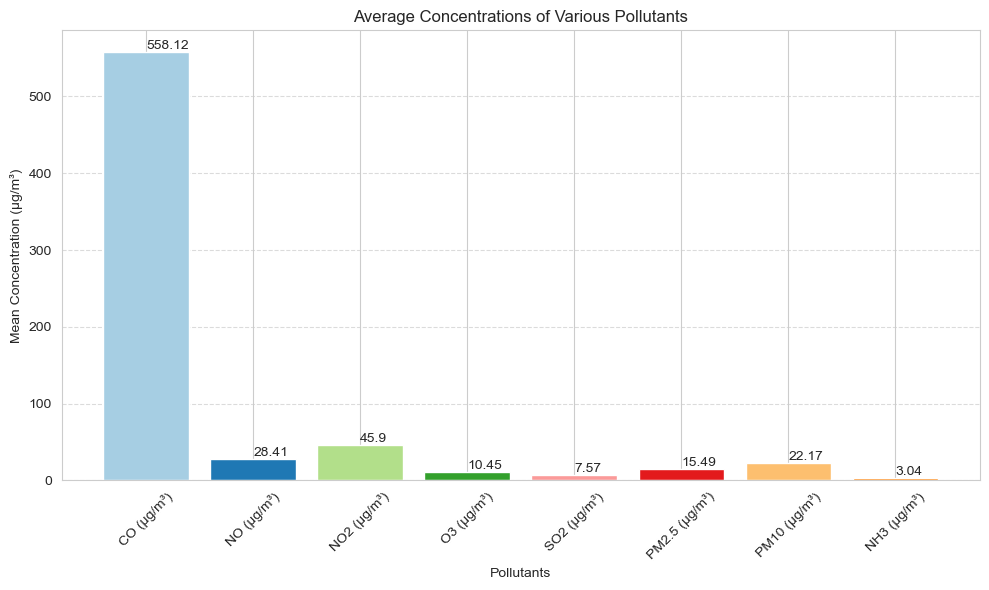

In [28]:
#Create a bar chart to illustrate mean levels

# Create a dictionary with the mean values
pollutant_means = {
    'CO (µg/m³)': mean_co,
    'NO (µg/m³)': mean_no,
    'NO2 (µg/m³)': mean_no2,
    'O3 (µg/m³)': mean_o3,
    'SO2 (µg/m³)': mean_so2,
    'PM2.5 (µg/m³)': mean_pm2_5,
    'PM10 (µg/m³)': mean_pm10,
    'NH3 (µg/m³)': mean_nh3
}

# Convert the dictionary to a DataFrame for easier plotting
df_means = pd.DataFrame(list(pollutant_means.items()), columns=['Pollutant', 'Mean Concentration'])

plt.figure(figsize=(10, 6))
bars = plt.bar(df_means['Pollutant'], df_means['Mean Concentration'], color=plt.cm.Paired(range(len(df_means))))

plt.title('Average Concentrations of Various Pollutants')
plt.xlabel('Pollutants')
plt.ylabel('Mean Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()

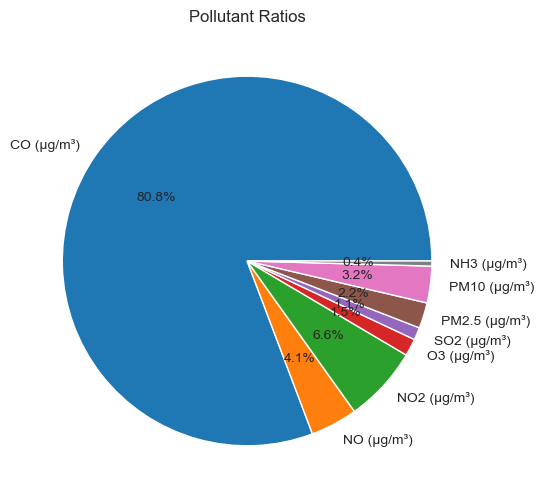

In [29]:
# Graph a pie chart to better illustrate pollutant ratios

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df_means['Mean Concentration'], labels=df_means['Pollutant'], autopct='%1.1f%%')
plt.title('Pollutant Ratios')
plt.show()

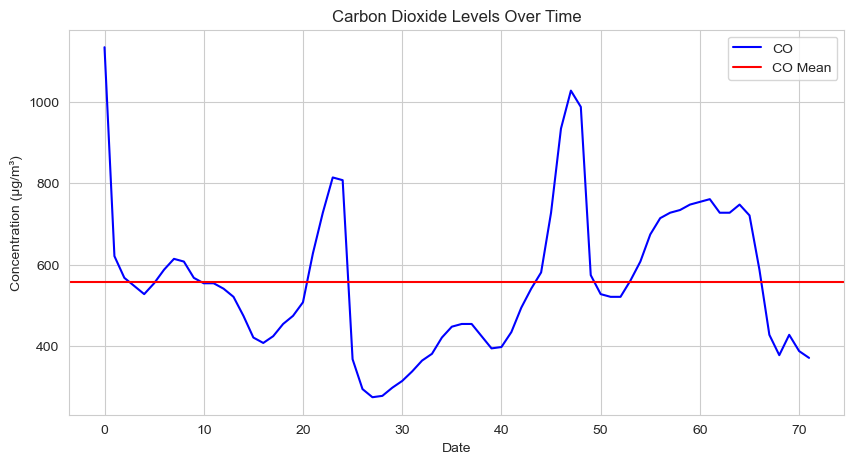

In [30]:
# Graph carbon monoxide levles over time

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['co'], linestyle='-', color='blue', label='CO')
plt.axhline(y=mean_co, color='red', linestyle='-', label='CO Mean')
plt.title('Carbon Dioxide Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

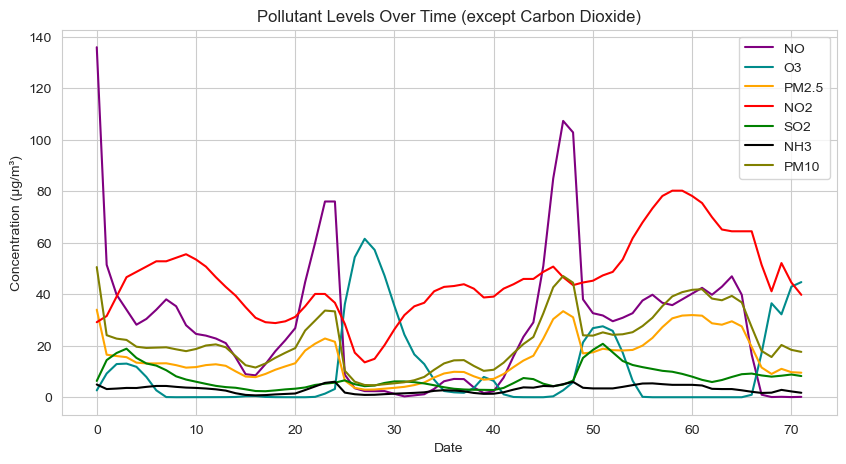

In [31]:
# Graph levels of other pollutants

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['no'], linestyle='-', color='purple', label='NO')
plt.plot(df.index, df['o3'], linestyle='-', color='darkcyan', label='O3')
plt.plot(df.index, df['pm2_5'], linestyle='-', color='orange', label='PM2.5')
plt.plot(df.index, df['no2'], linestyle='-', color='red', label='NO2')
plt.plot(df.index, df['so2'], linestyle='-', color='green', label='SO2')
plt.plot(df.index, df['nh3'], linestyle='-', color='black', label='NH3')
plt.plot(df.index, df['pm10'], linestyle='-', color='olive', label='PM10')
plt.title('Pollutant Levels Over Time (except Carbon Dioxide)')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()
#plt.plot(df.index, df['co'], marker='o', linestyle='-', color='lightblue', label='CO')

In [32]:
concentration_sum = df['no'] + df['co'] + df['o3'] + df['pm2_5'] + df['no2'] + df['so2'] + df['nh3'] + df['pm10']
smallest_five = concentration_sum.nsmallest(5)
largest_five = concentration_sum.nlargest(5)
corresponding_smallest_dates = df.loc[smallest_five.index, 'dt']
corresponding_largest_dates = df.loc[largest_five.index, 'dt']
corresponding_largest_dates

0    2020-11-27 15:00:00
47   2020-11-29 14:00:00
48   2020-11-29 15:00:00
46   2020-11-29 13:00:00
23   2020-11-28 14:00:00
Name: dt, dtype: datetime64[ns]

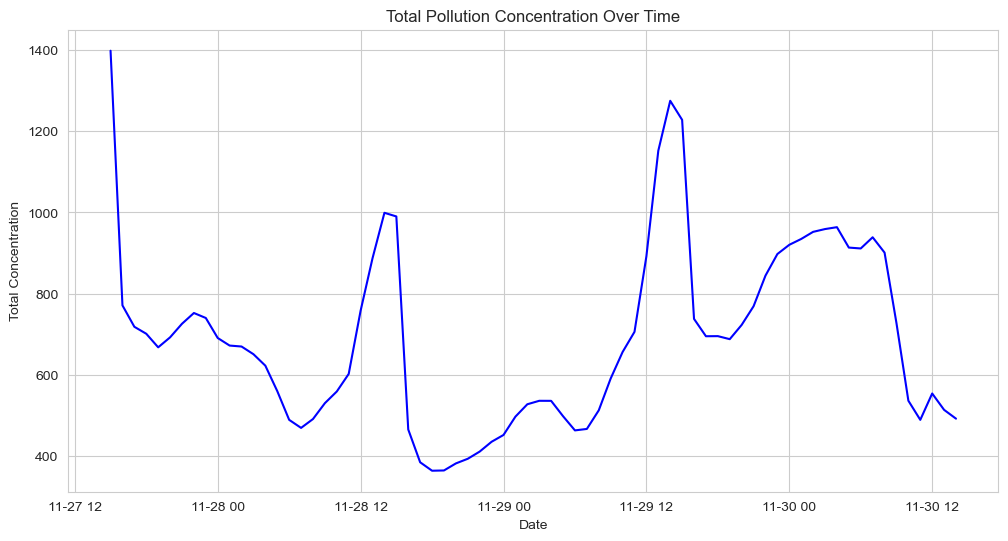

In [33]:
# Let's also look at the levels of total concentration of all the pollutants combined

concentration_sum = df[['no', 'co', 'o3', 'pm2_5', 'no2', 'so2', 'nh3', 'pm10']].sum(axis=1)
df['total_concentration'] = concentration_sum

df.set_index('dt', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['total_concentration'], linestyle='-', color='blue')
plt.title('Total Pollution Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('Total Concentration')
plt.grid(True)
plt.show()

In [34]:
# Finding smallest and largest total concentrations
smallest_five = concentration_sum.nsmallest(5)
largest_five = concentration_sum.nlargest(5)

# Display corresponding dates and concentration totals
corresponding_smallest_dates = df.loc[smallest_five.index, ['dt', 'total_concentration']]
corresponding_largest_dates = df.loc[largest_five.index, ['dt', 'total_concentration']]

# Display the results
print("Dates with the smallest total concentrations:")
print(corresponding_smallest_dates)
print("\nDates with the largest total concentrations:")
print(corresponding_largest_dates)

KeyError: "None of [Index([27, 28, 29, 26, 30], dtype='int64')] are in the [index]"